In [1]:
from ast import literal_eval
from pandas import DataFrame  # http://github.com/pydata/pandas
import re
import requests               # http://github.com/kennethreitz/requests
import subprocess
import sys

In [2]:
import matplotlib as plt
%matplotlib inline

In [3]:
corpora = dict(eng_us_2012=17, eng_us_2009=5, eng_gb_2012=18, eng_gb_2009=6,
               chi_sim_2012=23, chi_sim_2009=11, eng_2012=15, eng_2009=0,
               eng_fiction_2012=16, eng_fiction_2009=4, eng_1m_2009=1,
               fre_2012=19, fre_2009=7, ger_2012=20, ger_2009=8, heb_2012=24,
               heb_2009=9, spa_2012=21, spa_2009=10, rus_2012=25, rus_2009=12,
               ita_2012=22)

In [4]:
def getNgrams(query, corpus, startYear, endYear, smoothing, caseInsensitive):
    params = dict(content=query, year_start=startYear, year_end=endYear,
                  corpus=corpora[corpus], smoothing=smoothing,
                  case_insensitive=caseInsensitive)
    if params['case_insensitive'] is False:
        params.pop('case_insensitive')
    if '?' in params['content']:
        params['content'] = params['content'].replace('?', '*')
    if '@' in params['content']:
        params['content'] = params['content'].replace('@', '=>')
    req = requests.get('http://books.google.com/ngrams/graph', params=params)
    res = re.findall('var data = (.*?);\\n', req.text)
    if res:
        data = {qry['ngram']: qry['timeseries']
                for qry in literal_eval(res[0])}
        df = DataFrame(data)
        df.insert(0, 'year', list(range(startYear, startYear+len(df))))
        df.set_index('year', inplace=True)
        df = df[filter(lambda x:"(All)" in x, df.columns)]
    else:
        df = DataFrame()
    return req.url, params['content'], df

In [18]:
def word_freq(words1):
    q, word, df = getNgrams(words1[0], "eng_2012", 1800, 2010, True, True)

    for word in words1[1:]:
        q, word, df_ = getNgrams(word, "eng_2012", 1800, 2010, True, True)
        df = df.join(df_)
    return df

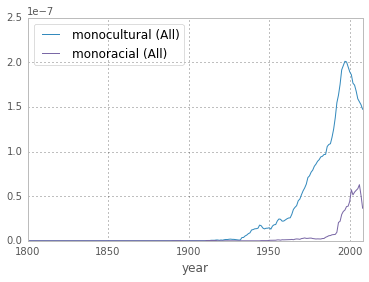

In [24]:
df1 = word_freq(['monocultural', 'monoracial']) 
df1.plot()

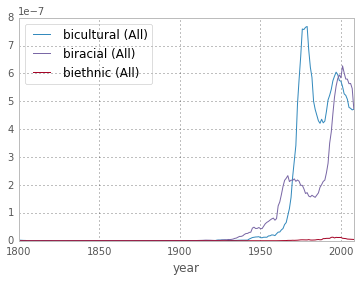

In [25]:
df2 = word_freq(['bicultural', 'biracial', 'biethnic'])
df2.plot()

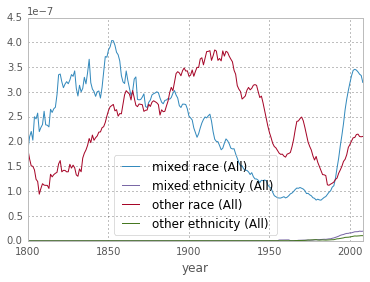

In [26]:
df3 = word_freq(['mixed race', 'mixed ethnicity', 'other race', 'other ethnicity'])
df3.plot()

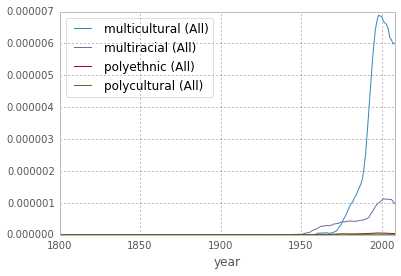

In [27]:
df4 = word_freq(['multicultural', 'multiracial', 'polyracial', 'polyethnic', 'polycultural'])
df4.plot()

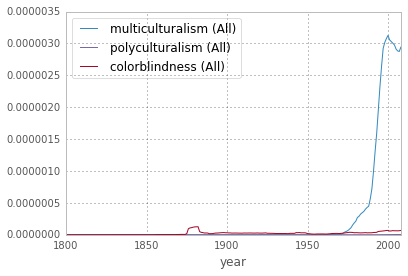

In [28]:
df5 = word_freq(['multiculturalism', 'polyculturalism', 'colorblindness'])
df5.plot()